---
## Models of Theoretical Physics
# Exercise Sheet 3 - Contact Process

The contact process is a simple yet powerful tool for understanding the dynamics of infection spread or, more broadly, state changes in a network. It is typically defined on a lattice where each site can either be in an 'infected' or 'healthy' state. In general, the dynamics of the model are governed by two primary processes:
- **Infection**: An infected site can infect its neighboring sites with a certain probability $\lambda$ per unit time.
- **Recovery**: Infected sites can recover and become healthy again with a probability $\mu$ per unit time.

The stochastic nature of the contact process can be described using a master equation, which encapsulates the probabilities of state changes (infection and recovery) in the system over time. The general form of the master equation for the contact process is as follows:

$$
\frac{dP(\sigma, t)}{dt} = \sum_{i} \left[ -\lambda \sigma_i P(\sigma, t) + \lambda (1 - \sigma_i) P(\sigma^i, t) \right] + \sum_{i} \left[ \mu (1 - \sigma_i) P(\sigma, t) - \mu \sigma_i P(\sigma^i, t) \right]
$$


Where:
- $ P(\sigma, t) $ is the probability of the system being in state $\sigma$ at time $t$.
- $\sigma_i $ represents the state of the $i$-th site (1 for infected, 0 for healthy).
- $\sigma^i $ is the state of the system with the $i$-th site's state flipped.
- $ \lambda $ is the infection rate.
- $ \mu $ is the recovery rate.





In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Parameters
lattice_size = 100  # Size of the lattice
max_time = 100  # Maximum time steps
infection_rates = [0.3, 0.6, 0.9]  # Infection rates (below, at, above critical)
recovery_rate = 0.0  # Recovery rate
initial_infected = 5  # Initial number of infected nodes

def run_simulation(infection_rate):
    # Initialize lattice with one infected node in the middle
    lattice = np.zeros(lattice_size)
    middle_index = lattice_size // 2
    lattice[middle_index - initial_infected // 2: middle_index + initial_infected // 2 + 1] = 1

    # Record lattice states over time
    lattice_states = np.zeros((max_time, lattice_size))
    lattice_states[0] = lattice.copy()

    for t in range(1, max_time):
        new_lattice = lattice.copy()
        for i in range(lattice_size):
            if lattice[i] == 1:
                # Infected node can recover
                if np.random.rand() < recovery_rate:
                    new_lattice[i] = 0
                # Infected node can infect neighbors
                for neighbor in [i-1, i+1]:
                    if 0 <= neighbor < lattice_size:
                        if np.random.rand() < infection_rate:
                            new_lattice[neighbor] = 1
        lattice = new_lattice
        lattice_states[t] = lattice

    return lattice_states

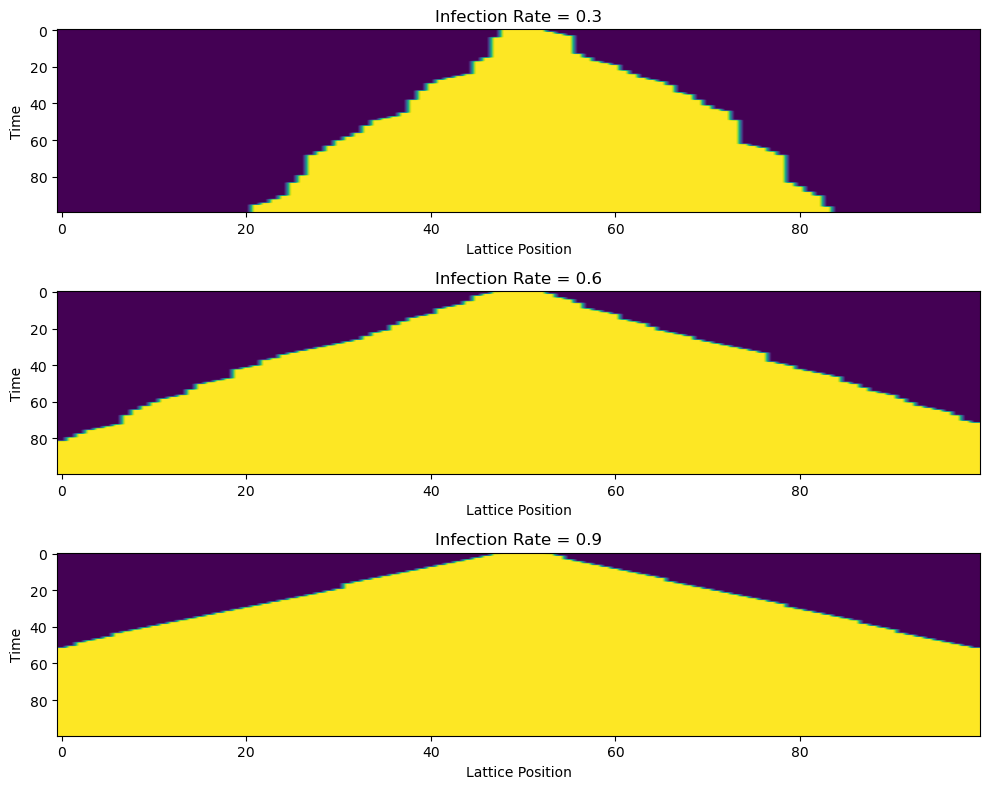

In [8]:
# Run simulations for different infection rates
simulations = [run_simulation(rate) for rate in infection_rates]

# Plotting
fig, axs = plt.subplots(len(infection_rates), 1, figsize=(10, 8))
for i, ax in enumerate(axs):
    ax.imshow(simulations[i], aspect='auto', cmap='viridis')
    ax.set_title(f"Infection Rate = {infection_rates[i]}")
    ax.set_ylabel('Time')
    ax.set_xlabel('Lattice Position')

plt.tight_layout()
plt.show()